### Fusion of Rain Radar Images and Wind Forecasts in a Deep Learning Model Applied to Rain Nowcasting
- Github: https://github.com/VincentBouget/rain-nowcasting-with-fusion-of-rainfall-and-wind-data-article

### 0. Overview
- #### Raw data are files in npz format, file names contain date, hour and minutes
- #### three folders for rain, wind-U and wind-V
- #### total dataset contains 18 files for each parameters (rain, U,V)
    - input data contains 36 frames (12 rain + 12 U + 12 V)
    - in order to use rain (30 minutes later) as target, 5 more frames added for each parameter. 
    - but **only the last one** will be picked as target
    - **one target** is picked, will **map to 3 images** based on "CRF over 1h" thresholds (0.1,1,2.5)

### 1. Datasets

- #### Dirs
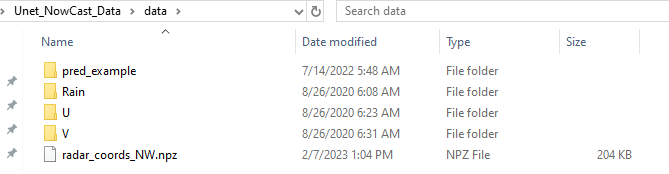

- Rain
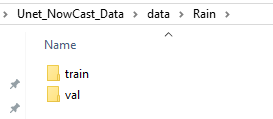
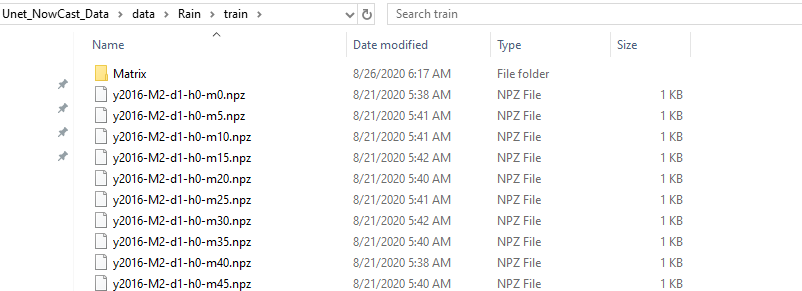

- Wind U,V Data has similar file structure


### 2. Copy some class files over the root folder of Jupyternotebook

- import samplers
- import utilities as utils
- from unet_model import UNet
- from dataset import MeteoNetDataset

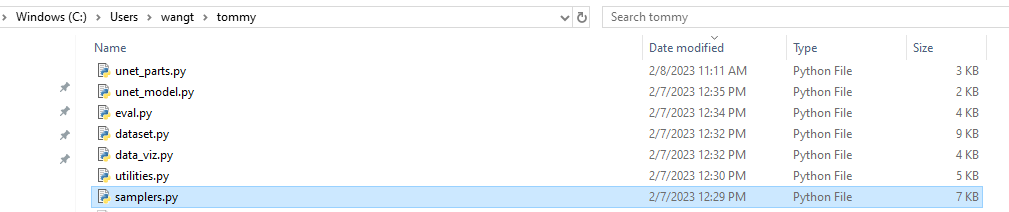

## Visualize Feature Maps among training

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Input

- 12 rain
- 12 Wind U
- 12 Wind V

In [3]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\dx0.npy')
target = data.transpose(2,3,1,0)
target.shape

(128, 128, 36, 32)

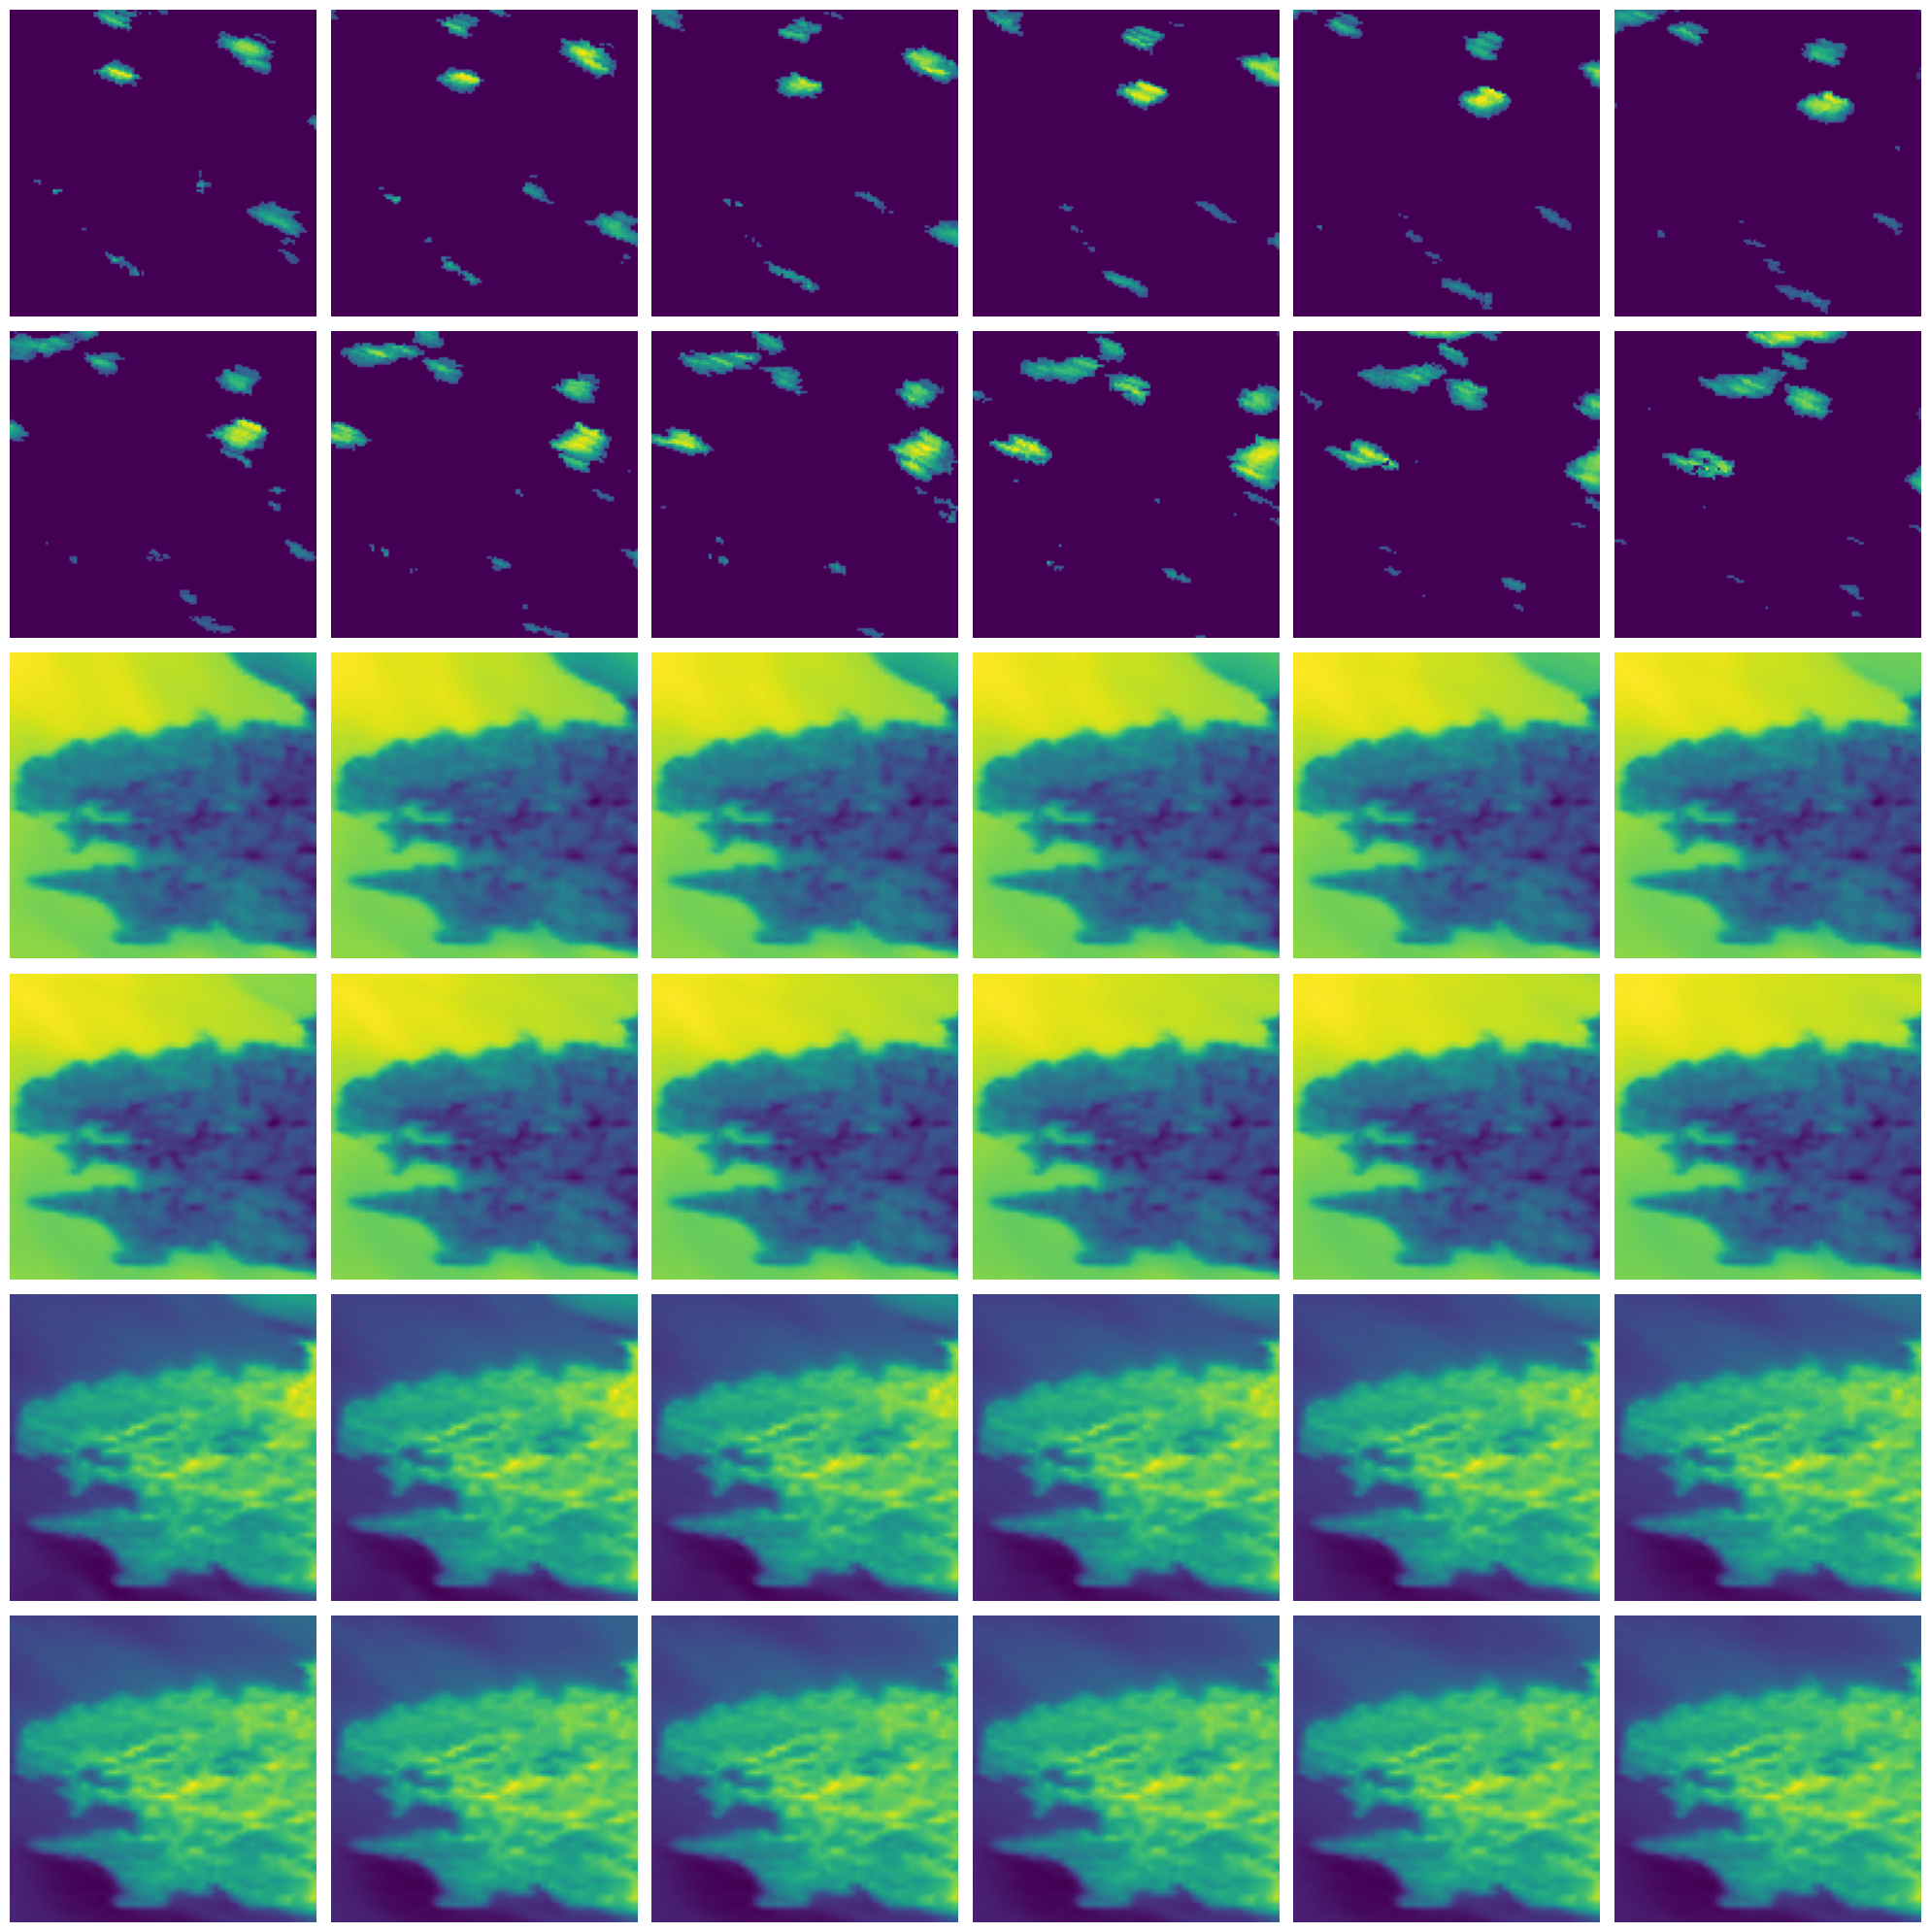

In [4]:
fig, axes = plt.subplots(6, 6, figsize=(20, 20))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(6):
    for j in range(6):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 2. Down Sampling 1
- 36 channels to 16 channels  
- n is set to 8, 2n=16

In [5]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\dx1.npy')
target = data.transpose(2,3,1,0)
target.shape

(128, 128, 16, 32)

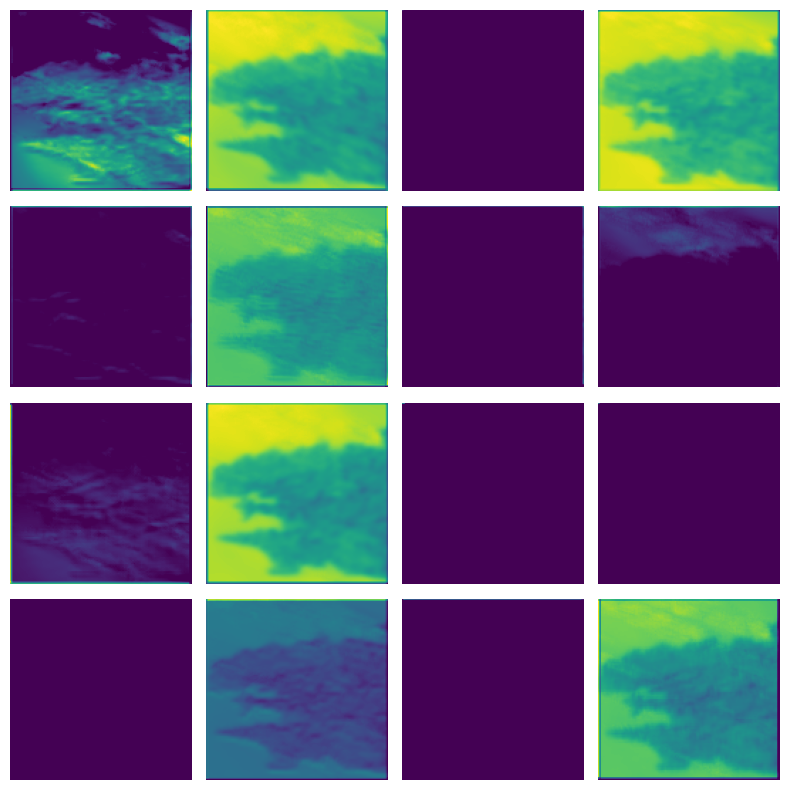

In [6]:
rows= 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 3. Down Sampling 2
- 16 channels to 32 channels
- size from 128x128 to 64x64

In [7]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\dx2.npy')
target = data.transpose(2,3,1,0)
target.shape

(64, 64, 32, 32)

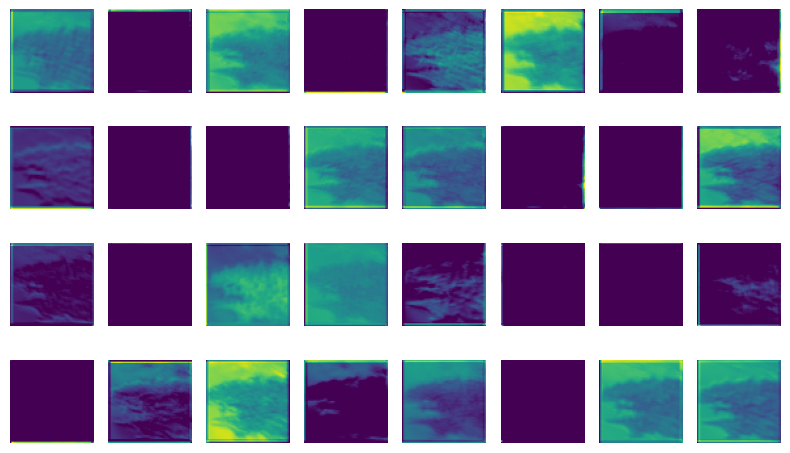

In [9]:
rows= 4
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(8, 5))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 4. Down Sampling 3
- 32 channels to 64 channels
- size from 64x64 to 32x32

In [10]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\dx3.npy')
target = data.transpose(2,3,1,0)
target.shape

(32, 32, 64, 32)

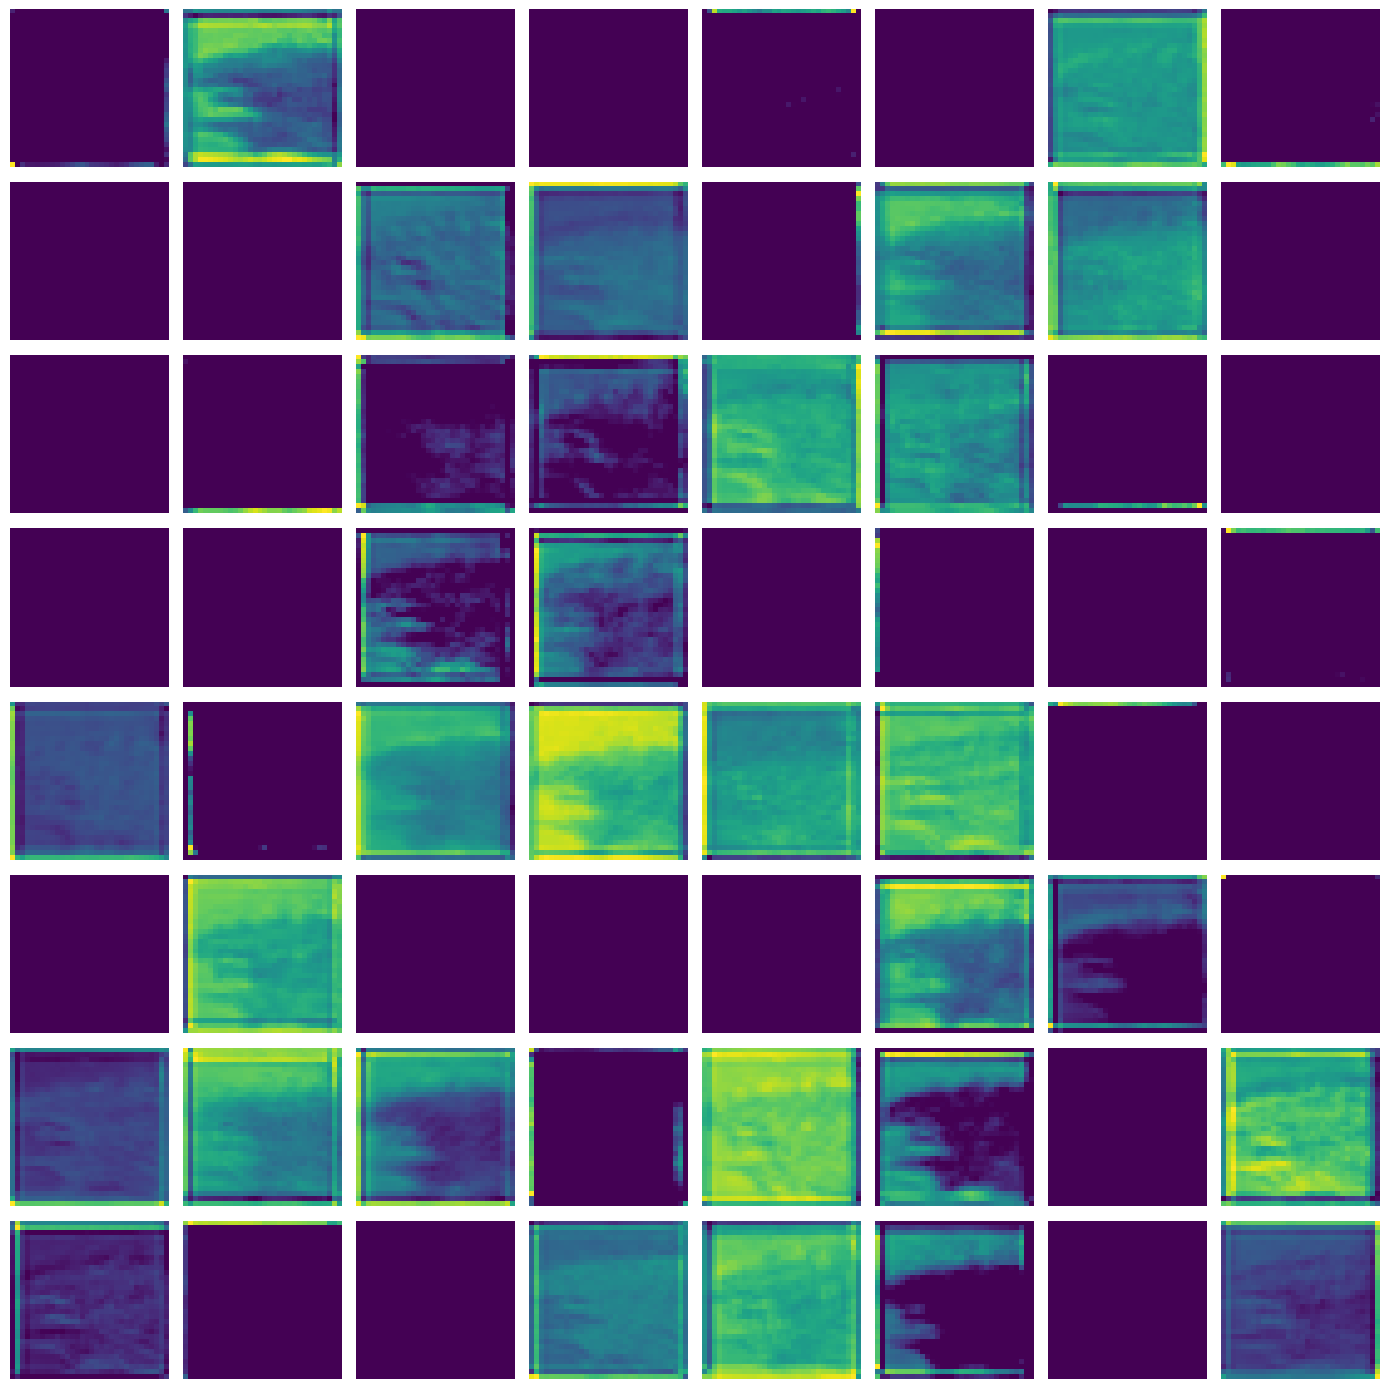

In [12]:
rows= 8
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 5. Down Sampling 4
- 64 channels to 128 channels
- size from 32x32 to 16x16

In [13]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\dx4.npy')
target = data.transpose(2,3,1,0)
target.shape

(16, 16, 128, 32)

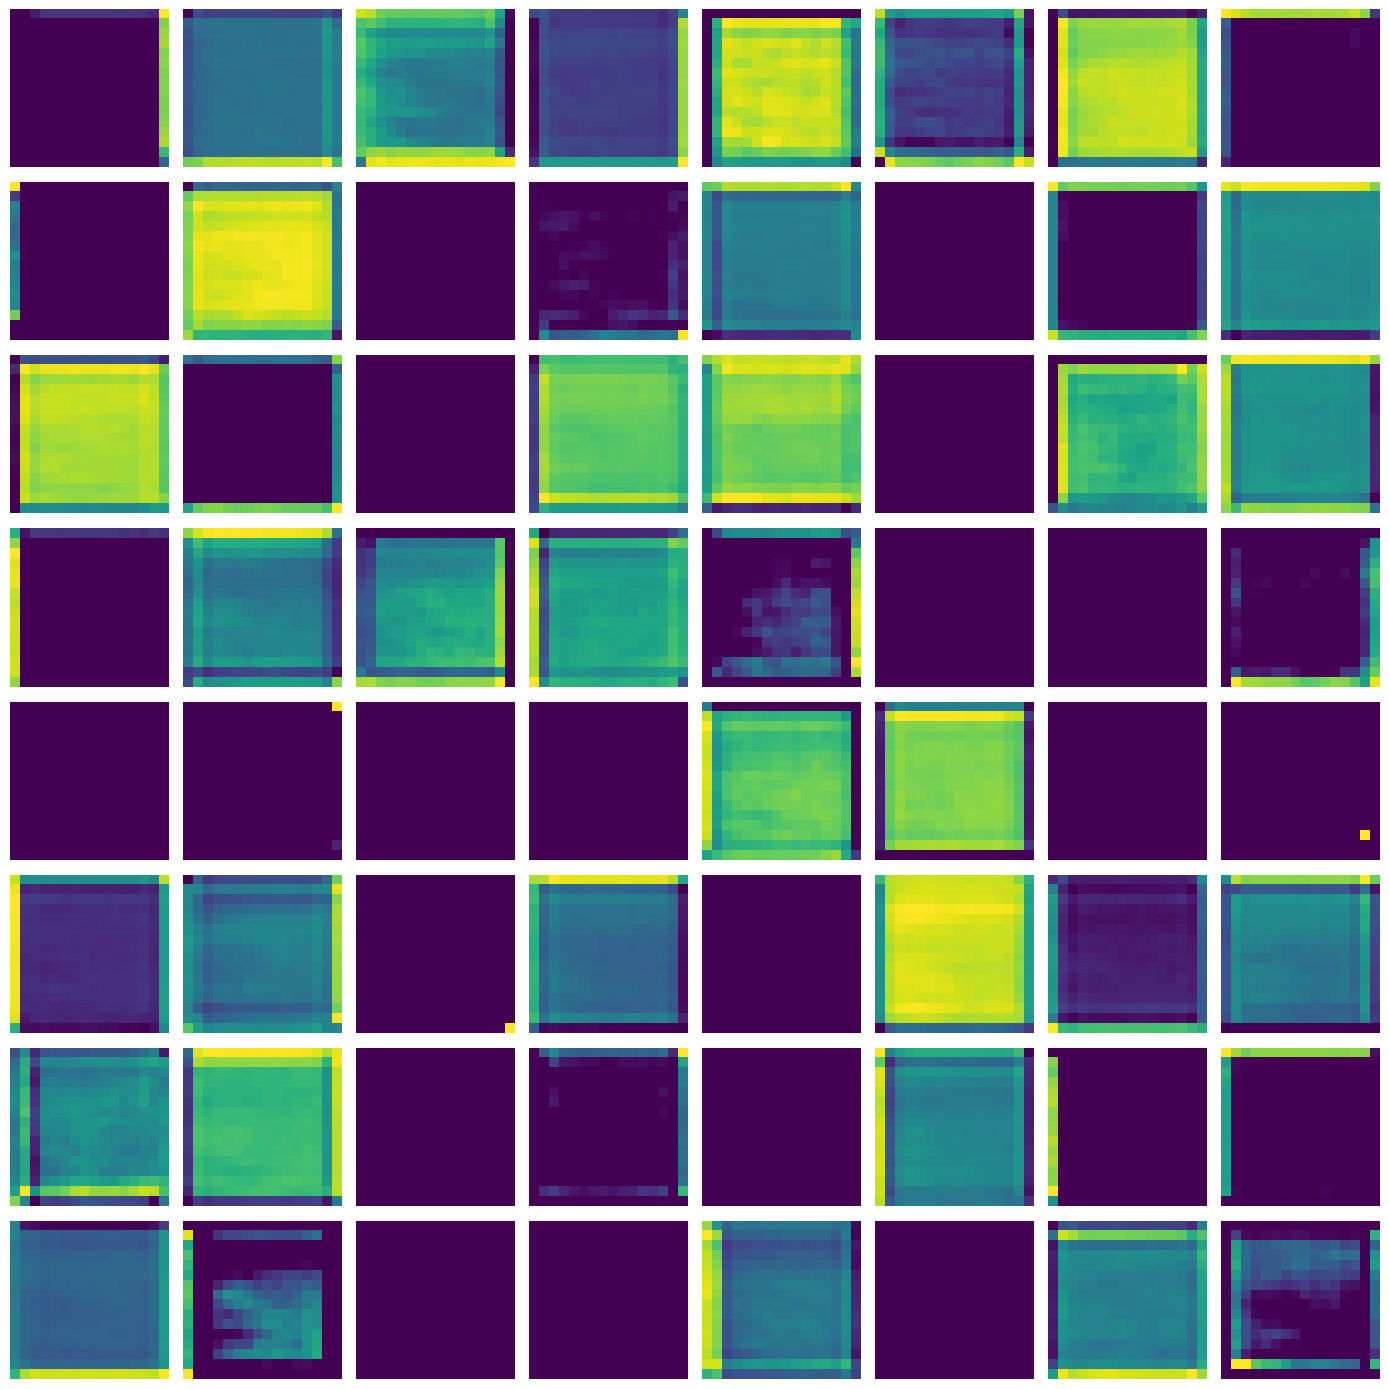

In [14]:
rows= 8
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 6. Down Sampling 4
- keeps 128 channels
- size from 16x16 to 8x8

In [15]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\dx5.npy')
target = data.transpose(2,3,1,0)
target.shape

(8, 8, 128, 32)

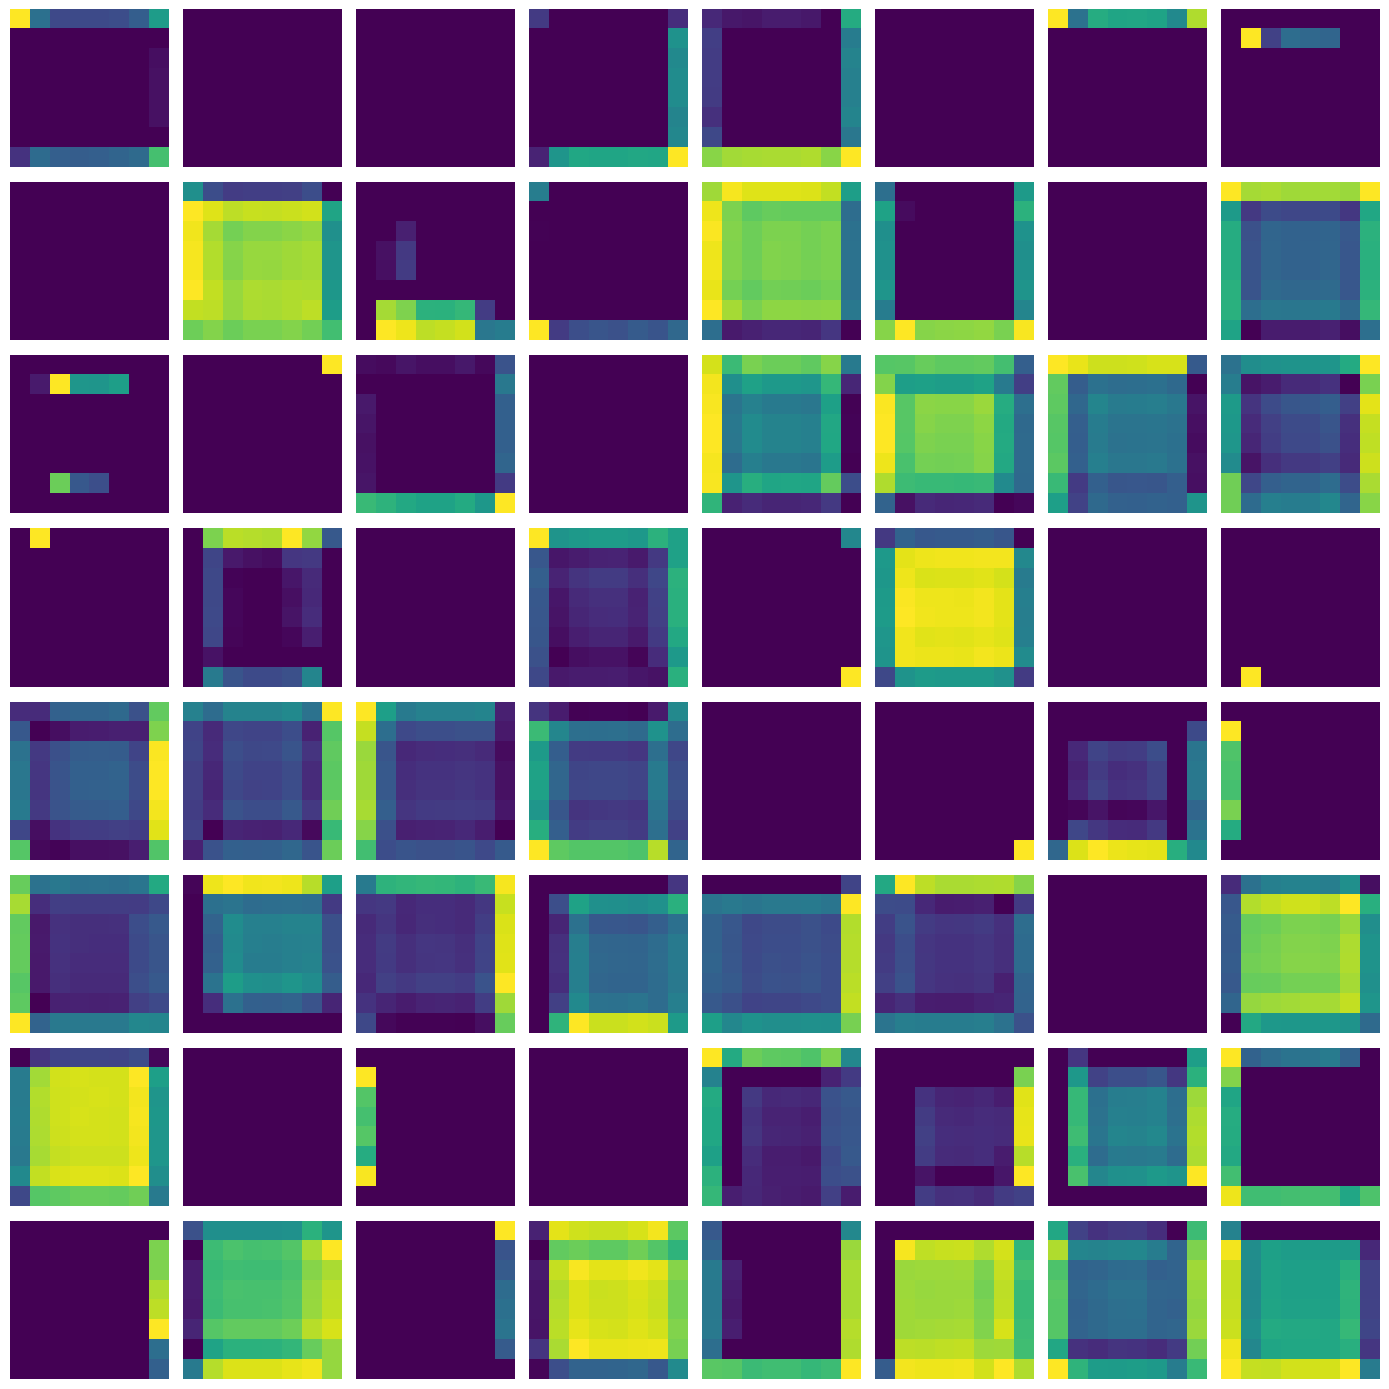

In [17]:
rows= 8
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 7. Up Scale 1

In [18]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\ux1.npy')
target = data.transpose(2,3,1,0)
target.shape

(16, 16, 64, 32)

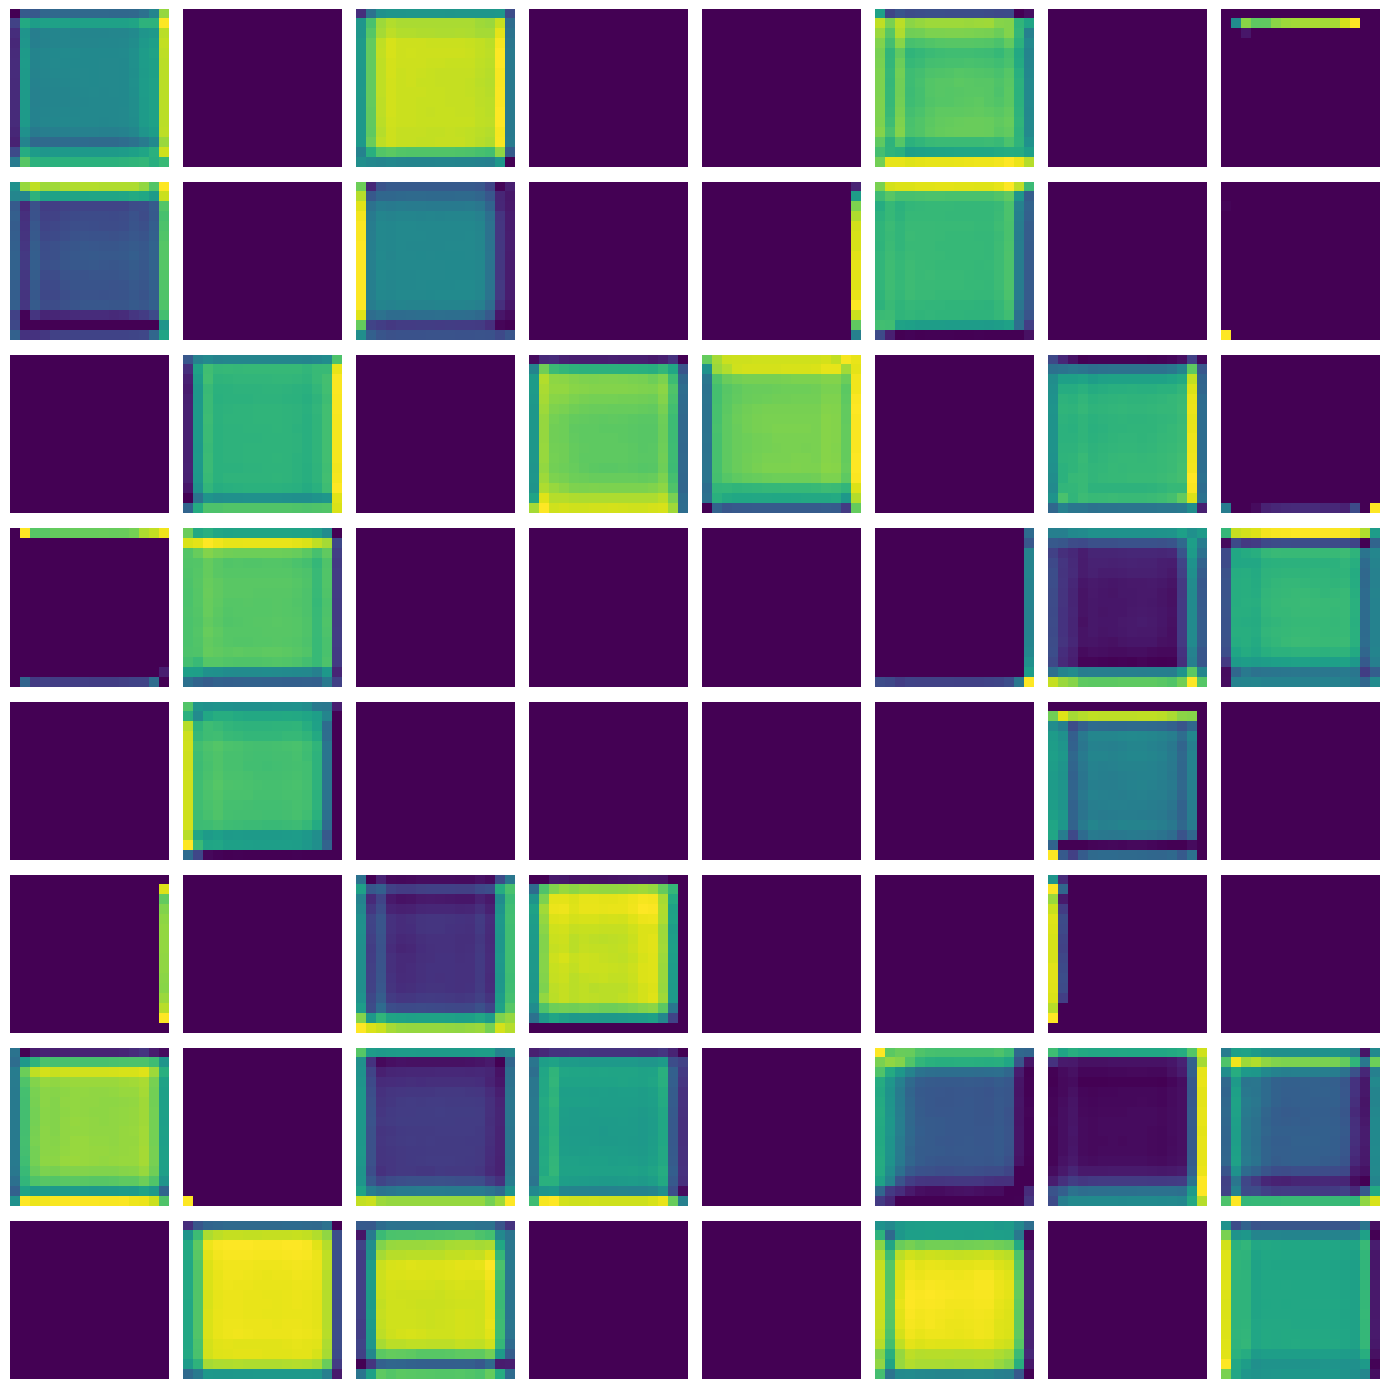

In [20]:
rows= 8
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 8. Up Scale 2

In [21]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\ux2.npy')
target = data.transpose(2,3,1,0)
target.shape

(32, 32, 32, 32)

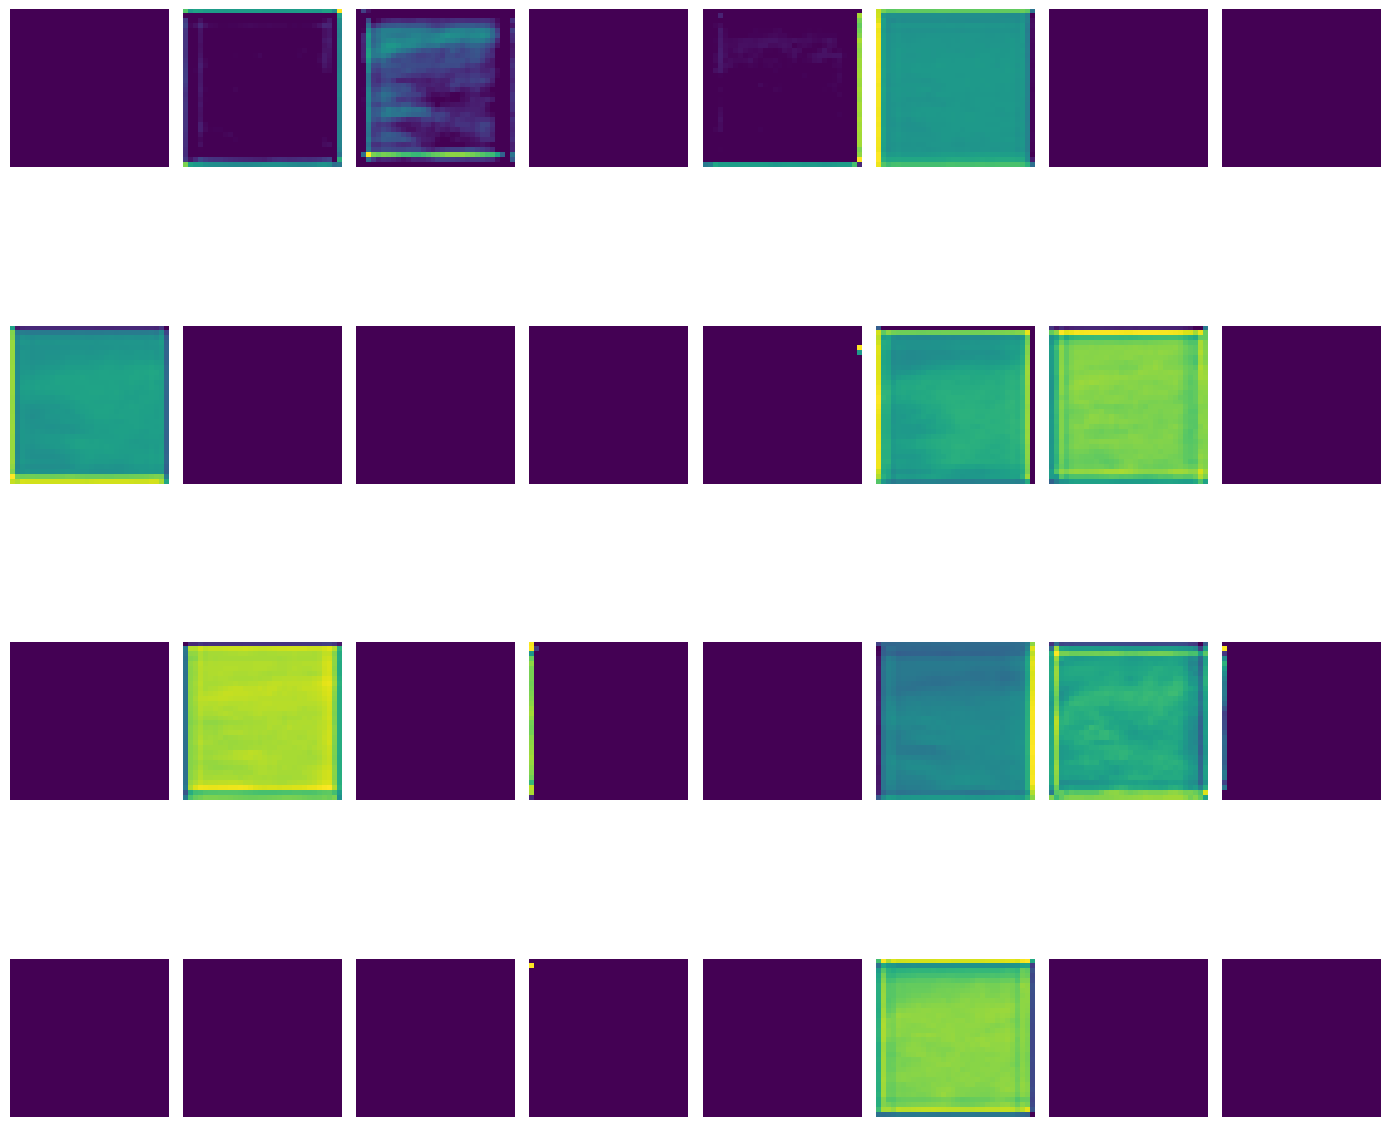

In [22]:
rows= 4
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 14))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 9. Up Scale 3

In [23]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\ux3.npy')
target = data.transpose(2,3,1,0)
target.shape

(64, 64, 16, 32)

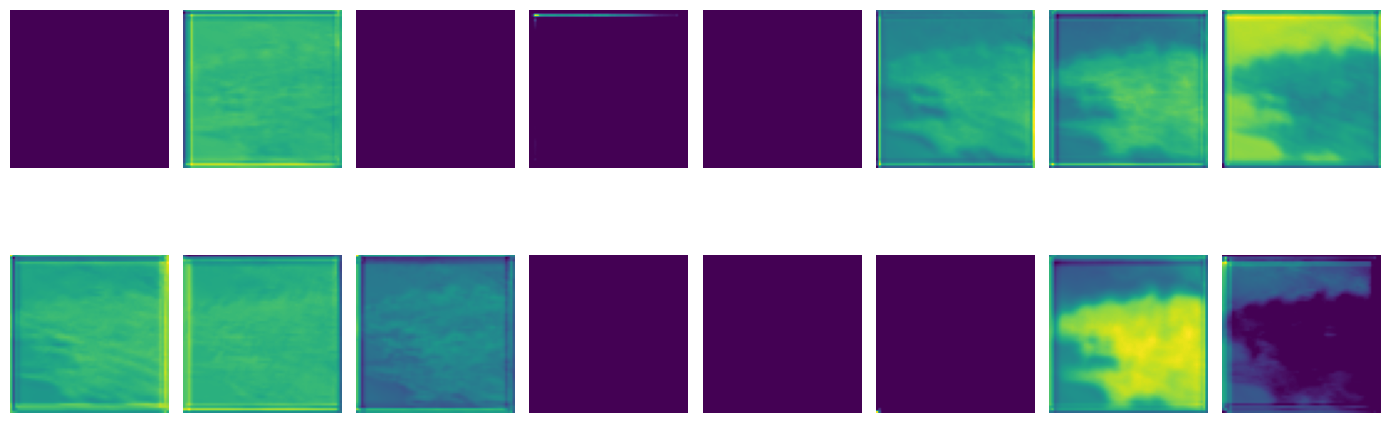

In [25]:
rows= 2
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 6))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 10. Up Scale 4

In [26]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\ux4.npy')
target = data.transpose(2,3,1,0)
target.shape

(128, 128, 16, 32)

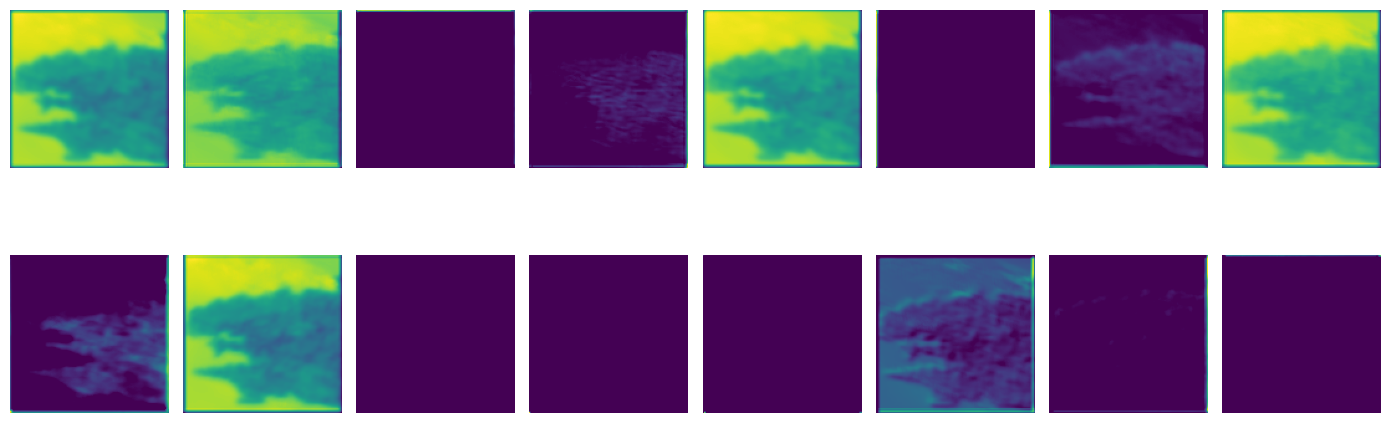

In [27]:
rows= 2
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(14, 6))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 11. Logits

In [28]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\ux5_logits.npy')
target = data.transpose(2,3,1,0)
target.shape

(128, 128, 3, 32)

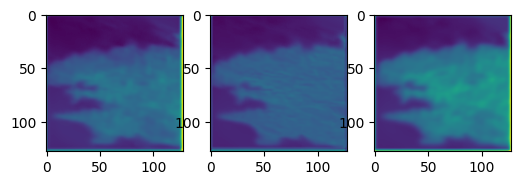

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(6, 3)) 
axes[0].imshow(target[:,:,0,0])
axes[1].imshow(target[:,:,1,0])
axes[2].imshow(target[:,:,2,0])
plt.show()

### 12. Input Images

In [30]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\input_imgs.npy')
target = data.transpose(2,3,1,0)
target.shape

(128, 128, 36, 32)

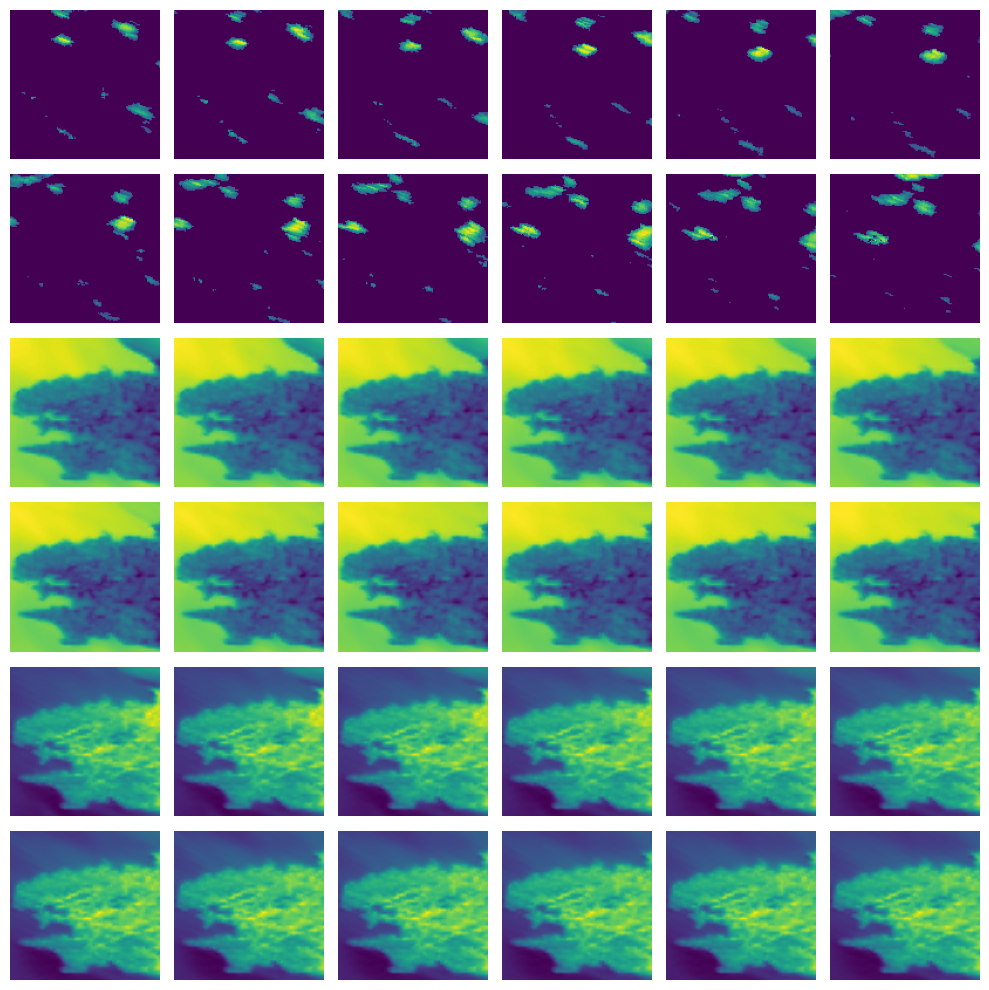

In [31]:
rows= 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))  # Adjust figsize as needed

c=0
# Plot each image
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(target[:,:,c,0])
        axes[i, j].axis('off')
        c=c+1

plt.tight_layout()
plt.show()

### 13. Predict Image

In [32]:
data = np.load(r'D:\Tommy\++AI\Unet_NowCast_Data\filter_images\predict_img.npy')
target = data.transpose(2,3,1,0)
target.shape

(128, 128, 3, 32)

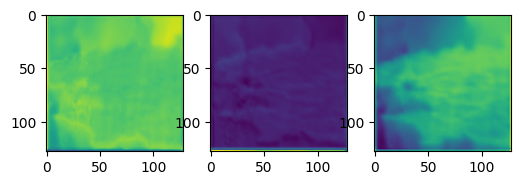

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(6, 3)) 
axes[0].imshow(target[:,:,0,0])
axes[1].imshow(target[:,:,1,0])
axes[2].imshow(target[:,:,2,0])
plt.show()